In [16]:
import glob
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage.feature import hog
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import Activation

In [17]:
vehicle_image_arr = glob.glob('/home/shubhendu/Pictures/Vehicle Detection/vehicles/vehicles/*/*.png')

# read images and append to list
vehicle_images_original=[]
for imagePath in vehicle_image_arr:
    readImage=cv2.imread(imagePath)
    #rgbImage = cv2.cvtColor(readImage, cv2.COLOR_BGR2RGB)
    grayImage = cv2.cvtColor(readImage, cv2.COLOR_BGR2GRAY)
    vehicle_images_original.append(grayImage)

print('Reading of Vehicle Images Done')

non_vehicle_image_arr = glob.glob('/home/shubhendu/Pictures/Vehicle Detection/non-vehicles/non-vehicles/*/*.png')


non_vehicle_images_original=[]
for imagePath in non_vehicle_image_arr:
    readImage=cv2.imread(imagePath)
    #rgbImage = cv2.cvtColor(readImage, cv2.COLOR_BGR2RGB)
    grayImage = cv2.cvtColor(readImage, cv2.COLOR_BGR2GRAY)
    non_vehicle_images_original.append(grayImage)

print("Reading of Non Vehicle Images Done")

print("No of Vehicle Images Loaded -"+ str(len(vehicle_image_arr)))
print("No of Non-Vehicle Images Loaded -"+ str(len(non_vehicle_images_original)))

Reading of Vehicle Images Done
Reading of Non Vehicle Images Done
No of Vehicle Images Loaded -8792
No of Non-Vehicle Images Loaded -8968


In [18]:
vehicle_images_array = np.array(vehicle_images_original)
non_vehicle_images_array = np.array(non_vehicle_images_original)

In [19]:
dataList = np.vstack([vehicle_images_array, non_vehicle_images_array])
print(dataList.shape)
labelList= np.concatenate([np.ones(len(vehicle_image_arr)), np.ones(len(non_vehicle_images_original))])
print(labelList.shape)

(17760, 64, 64)
(17760,)


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(dataList, labelList, test_size=0.2, shuffle=True)

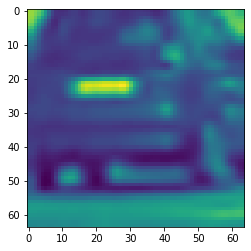

In [21]:
%matplotlib inline
plt.imshow(X_train[0])

In [22]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

In [23]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(Y_train, 2)
y_test = np_utils.to_categorical(Y_test, 2)

In [25]:
model = Sequential()

 
model.add(Conv2D(20, (3, 3), activation='relu', input_shape=(64,64,1))) # 62
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(26, (3, 3), activation='relu')) # 60
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(20, (1, 1), activation='relu')) # 60
model.add(MaxPooling2D(pool_size=(2, 2))) # 30

model.add(Conv2D(26, (3, 3), activation='relu')) # 28
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(30, (3, 3), activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(24, (1, 1), activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) # 12

#model.add(Convolution2D(26, 1, 1, activation='relu')) # 12

model.add(Conv2D(30, (3, 3), activation='relu')) # 10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(40, (3, 3), activation='relu')) # 8
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(26, (1, 1), activation='relu')) # 8
model.add(MaxPooling2D(pool_size=(2, 2))) # 4

model.add(Conv2D(30, (1, 1), activation='relu')) # 4
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(2, 1, activation='relu')) #4
model.add(Conv2D(2, 4))
model.add(Flatten())
model.add(Activation('softmax'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 20)        200       
_________________________________________________________________
batch_normalization_8 (Batch (None, 62, 62, 20)        80        
_________________________________________________________________
dropout_8 (Dropout)          (None, 62, 62, 20)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 26)        4706      
_________________________________________________________________
batch_normalization_9 (Batch (None, 60, 60, 26)        104       
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 60, 26)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 60, 60, 20)       

In [32]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(lr=0.003), 
              metrics=['accuracy'])

In [33]:
model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 14208 samples, validate on 3552 samples
Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
14208/14208 [==============================] - 30s 2ms/step - loss: 0.0392 - accuracy: 0.9872 - val_loss: 8.9585e-05 - val_accuracy: 1.0000
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
14208/14208 [==============================] - 19s 1ms/step - loss: 1.2851e-04 - accuracy: 1.0000 - val_loss: 8.9097e-06 - val_accuracy: 1.0000
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
14208/14208 [==============================] - 19s 1ms/step - loss: 6.6705e-05 - accuracy: 1.0000 - val_loss: 3.2045e-06 - val_accuracy: 1.0000
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
14208/14208 [==============================] - 18s 1ms/step - loss: 5.3829e-05 - accuracy: 1.0000 - val_loss: 2.2486e-06 - val_accuracy: 1.0000
Epoch 5/50

Epoch 00005: LearningRateSched

14208/14208 [==============================] - 18s 1ms/step - loss: 4.0828e-06 - accuracy: 1.0000 - val_loss: 9.4542e-07 - val_accuracy: 1.0000
Epoch 37/50

Epoch 00037: LearningRateScheduler setting learning rate to 0.0002403076.
14208/14208 [==============================] - 18s 1ms/step - loss: 3.4069e-06 - accuracy: 1.0000 - val_loss: 9.1810e-07 - val_accuracy: 1.0000
Epoch 38/50

Epoch 00038: LearningRateScheduler setting learning rate to 0.0002343201.
14208/14208 [==============================] - 18s 1ms/step - loss: 3.3310e-06 - accuracy: 1.0000 - val_loss: 8.9152e-07 - val_accuracy: 1.0000
Epoch 39/50

Epoch 00039: LearningRateScheduler setting learning rate to 0.0002286237.
14208/14208 [==============================] - 18s 1ms/step - loss: 3.1666e-06 - accuracy: 1.0000 - val_loss: 8.6111e-07 - val_accuracy: 1.0000
Epoch 40/50

Epoch 00040: LearningRateScheduler setting learning rate to 0.0002231977.
14208/14208 [==============================] - 18s 1ms/step - loss: 2.9360e-

In [34]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[5.988645613842481e-07, 1.0]


In [35]:
model.save("my_h5_model.h5")